In [ ]:
#@Author :Lenka Sai Surya Sashank
#Date : 01-09-2021
#Version
#Tensorflow
#Keras
#Python 3.7.6
#Pandas == 1.0.5
#Numpy  == 1.20.2
#seaborn == 0.10.0
#sklearn == 0.22.1

#Please use it for reference , Donot copy paste  :')

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
import nltk
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\L
[nltk_data]     SURYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load the dataset

We will load the individual dataset, create a target attribute which will indicate '1' if the news is fake. Combine both the dataframes and create the combine dataframe for modelling

In [15]:
# load the fake and real news datasets
fake_news = pd.read_csv("Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
true_news = pd.read_csv("True.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
# Create a column with fake=1 in fake_news dataset
fake_news['fake']=1
fake_news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [18]:
# Create a column with fake=0 in true_news dataset
true_news['fake'] = 0
true_news.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [19]:
# Concat two fake and true news
news = pd.concat([fake_news, true_news])
news.sample(5)

,title,text,subject,date,fake
10989,#SteveBannon’s Secret “To Do” List Is Accident...,President Trump s Chief Strategist Steve Banno...,politics,"May 3, 2017",1
17884,"'Brexit not a game,' EU's Barnier says","LONDON (Reuters) - Brexit is not a game, the...",worldnews,"October 10, 2017",0
13295,HERE’S WHAT HILLARY’S “FAIR GROWTH” Economic P...,If you ve never heard Betsy McCaughey speak ...,politics,"Aug 9, 2016",1
4521,Trump presses China on North Korea ahead of Xi...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 2, 2017",0
1465,Factbox: Price resignation is latest Trump adm...,(Reuters) - U.S. Health and Human Services Sec...,politicsNews,"September 29, 2017",0


In [20]:
# Check for any null values
news.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [21]:
# Check the info
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Exploratory Data Analysis and Data Visualizations

<AxesSubplot:xlabel='fake', ylabel='count'>

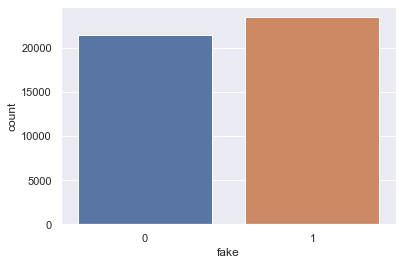

In [22]:
# Explore the target variable
sns.countplot(x='fake', data=news)

In [23]:
# Explore 2 text for the fake dataset
news[news['fake']==1]['text'].head(2)

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
Name: text, dtype: object

In [24]:
# Explore 2 text for true news
news[news['fake']==0]['text'].head(2)

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
Name: text, dtype: object

<AxesSubplot:xlabel='subject', ylabel='count'>

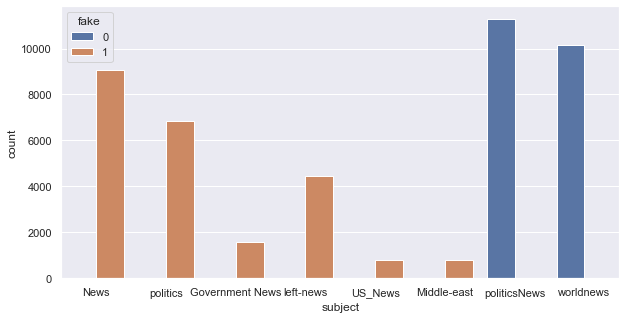

In [25]:
# Explore the subject column
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=news, hue='fake')

### Feature Engineering

We will create a new columns calld Month and Year from Date and Analyse whether fake or true news has some correlation with Month or Year in the timeline

In [26]:
news['date'] = pd.to_datetime(news['date'], errors='coerce')
news['Year'] = news['date'].dt.year
news['Month'] = news['date'].dt.month

news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


<AxesSubplot:xlabel='Year', ylabel='count'>

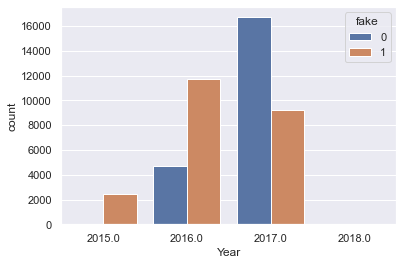

In [27]:
# check the impact of year on tha target
sns.countplot(x='Year', data=news, hue='fake')

<AxesSubplot:xlabel='Month', ylabel='count'>

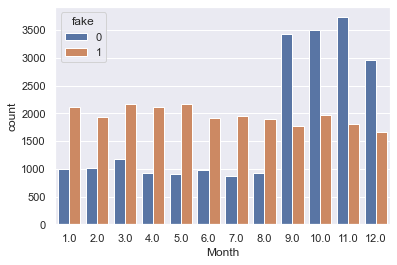

In [28]:
# Check the impact of Month on the target variable
sns.countplot(x='Month', data=news, hue='fake')

We will combine the title and text column

In [29]:
news['text'] = news['title'] + news['text']
news.drop(labels=['title'], axis=1,inplace=True)
news.head()

,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25,1,2017.0,12.0


### Preparing the final data


We will remove the subject attribute - Since it perfectly distributes the target variable We will remove the Year attribute - This also has a clear division for the target variable We will remove the Month Attribute - This also has a very clear approach of demarcating the target variable

For now we will just go ahead with the "text attribute"

In [30]:
news.drop(labels=['subject','date', 'Year','Month'], axis=1, inplace=True)
news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


### Split the dataset into training and testing

#### We will shuffle the dataframe and extract the feature and label


In [31]:
news = news.sample(frac=1)
news.head()

,text,fake
20984,Merkel wants EU to consider halting Turkish ac...,0
15768,Flanders premier calls on EU to take action on...,0
9635,Top U.S. official visits Vietnam to assess hum...,0
20846,Gupta emails still under investigation: top So...,0
22646,BATTLE OVER PRIVACY: Why the FBI’s Case Agains...,1


In [33]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels=train_test_split(news['text'].to_numpy(),
                                                                            news['fake'].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)

In [34]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(35918, 8980, 35918, 8980)

In [35]:
train_sentences[:2], train_labels[:10]

(array(['NSA risks talent exodus amid morale slump, Trump fearsWASHINGTON (Reuters) - The National Security Agency risks a brain-drain of hackers and cyber spies due to a tumultuous reorganization and worries about the acrimonious relationship between the intelligence community and President Donald Trump, according to current and former NSA officials and cybersecurity industry sources. Half-a-dozen cybersecurity executives told Reuters they had witnessed a marked increase in the number of U.S. intelligence officers and government contractors seeking employment in the private sector since Trump took office on Jan. 20.  One of the executives, who would speak only on condition of anonymity, said he was stunned by the caliber of the would-be recruits. They are coming from a variety of government intelligence and law enforcement agencies, multiple executives said, and their interest stems in part from concerns about the direction of U.S intelligence agencies under Trump.   Retaining and rec

### Converting text into numbers


When dealing with a text problem, one of the first things you'll have to do before you cna build a model is to covert your text to numbers.

There are a few ways to do this, namely:

Tokenization -direct mapping of token (a token could be a word or a character ) to a number.
Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned).

## Text Vectorization (tokenization)

In [37]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences)) #avg no.of tokens

416

In [38]:
max_vocab_length = 10000
max_length = 418


from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode='int',
                                   output_sequence_length=max_length)

In [39]:
text_vectorizer.adapt(train_sentences) # Fit the text vectorizer to the training text

In [40]:
#Create a sample sentences and tekenize it
sample_sentence = "Please Do Not Forget To Upvoted"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[1711,   91,   25, 2914,    3,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [41]:
# choose a random sentence from the training dataset and tokeize it
import random
random_sentence = random.choice(train_sentences)
print(f"Original text;\n{random_sentence}\
\n\n Vectorized Version:")
text_vectorizer([random_sentence])

Original text;
NEW REPORT: OBAMAPHONE Program Stashed $9 BILLION In Private Bank Accounts…Exposes Massive Windfall For Phone CompaniesWho could forget the  Obamaphone Lady  from Cleveland, OH, who unashamedly told an interviewer she was voting for Obama because all minorities in Cleveland get a free Obamaphone from Obama, and  He s gonna do more!  She actually woke up and admitted that she, and other minorities had been played by Obama in a follow-up video at the bottom of the page.The controversial  Obamaphone  program, which pays for cellphones for the poor, is rife with fraud, according to a new government report released Thursday that found more than a third of enrollees may not even be qualified.Known officially as the Lifeline Program, the phone giveaway became a symbol of government waste in the previous administration. Now a new report from the Government Accountability Office bears out those concerns.The report, requested by Sen. Claire McCaskill, Missouri Democrat, also says 

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[  61,  254,    1,  329,    1, 1135,  334,    7,  513,  748,    1,
        1188,    1,   10,  971,    1,   84, 2914,    2,    1, 1484,   26,
        2945, 2009,   30,    1,   86,   31, 8588,   52,   18,  666,   10,
          75,   92,   56, 2511,    7, 2945,  127,    5,  392,    1,   26,
          75,    6,   13,   11, 2307,   91,   49,   52,  361, 8073,   64,
           6, 1686,    8,   52,    6,   82, 2511,   42,   45, 1590,   21,
          75,    7,    5, 9666,  188,   27,    2, 2692,    4,    2,    1,
        1480,    1,  329,   51, 5860,   10,    1,   10,    2, 1086,   12,
           1,   17, 1093,  166,    3,    5,   61,   71,  254,  439,  209,
           8,  343,   49,   79,    5, 1004,    4,    1,  119,   25,  107,
          23,    1, 2563,   19,    2, 9865,  329,    2,  971,    1,  909,
           5, 4797,    4,   71, 3311,    7,    2, 1083,  152,  103,    5,
          61,  254,   26,    2,   71, 3984,  173, 5747,   55,  1

### Creating an Embedding using an Embedding Layer


To make our embedding we're going to use TensorFlow's embedding layer

The parameters we care most about for our embedding layer:

input_dim = the size of our vocabulary
output_dim = the size of output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
input_length = length of the sequences being passed to be embedding layer

In [47]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            input_length=max_length)
embedding

In [48]:
# Get a random sentence from the training set
random_sentenc = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedd version: ")
embedding(text_vectorizer([random_sentence]))

Original text:
NEW REPORT: OBAMAPHONE Program Stashed $9 BILLION In Private Bank Accounts…Exposes Massive Windfall For Phone CompaniesWho could forget the  Obamaphone Lady  from Cleveland, OH, who unashamedly told an interviewer she was voting for Obama because all minorities in Cleveland get a free Obamaphone from Obama, and  He s gonna do more!  She actually woke up and admitted that she, and other minorities had been played by Obama in a follow-up video at the bottom of the page.The controversial  Obamaphone  program, which pays for cellphones for the poor, is rife with fraud, according to a new government report released Thursday that found more than a third of enrollees may not even be qualified.Known officially as the Lifeline Program, the phone giveaway became a symbol of government waste in the previous administration. Now a new report from the Government Accountability Office bears out those concerns.The report, requested by Sen. Claire McCaskill, Missouri Democrat, also says 

<tf.Tensor: shape=(1, 418, 128), dtype=float32, numpy=
array([[[ 0.00534108, -0.01943518,  0.00766591, ..., -0.00952455,
         -0.04098507,  0.00878196],
        [-0.02155606, -0.04664079, -0.0393576 , ..., -0.03295497,
          0.03006491,  0.00349672],
        [ 0.04311179, -0.03698508, -0.00176573, ..., -0.01355367,
         -0.04829703, -0.0060714 ],
        ...,
        [-0.02998011,  0.0338701 ,  0.02456823, ..., -0.04979665,
         -0.00559642,  0.02524916],
        [-0.00508294,  0.00830574,  0.00137364, ..., -0.03766972,
         -0.04167466, -0.03881166],
        [-0.02048026, -0.0453148 , -0.01045861, ..., -0.01509557,
          0.0253149 , -0.04134144]]], dtype=float32)>

### Modelling


We will be using LSTM(long-short term memory) neural network.

In [50]:
from tensorflow.keras import layers
import tensorflow as tf
inputs = layers.Input(shape=(1,),dtype='string')

# Pass inputs to text_vectorizer(convert text into numbers)
x = text_vectorizer(inputs) 

# Convert text_vectorizer layer into embedding layer
x = embedding(x)

# Model 
x = layers.LSTM(64)(x)


# output
outputs = layers.Dense(1, activation='sigmoid')(x)

# Pass inputs and outputs to our model
model = tf.keras.Model(inputs, outputs, name='model_LSTM')

In [51]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 418)               0         
_________________________________________________________________
embedding (Embedding)        (None, 418, 128)          1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [53]:
# Fit the model
model_history = model.fit(train_sentences,
                         train_labels,
                          epochs=5,
                         validation_data=(val_sentences, val_labels))

Epoch 1/5
1123/1123 [==============================] - 190s 168ms/step - loss: 0.4475 - accuracy: 0.7982 - val_loss: 0.2692 - val_accuracy: 0.9159
Epoch 2/5
1123/1123 [==============================] - 196s 174ms/step - loss: 0.2713 - accuracy: 0.9082 - val_loss: 0.1809 - val_accuracy: 0.9504
Epoch 3/5
1123/1123 [==============================] - 204s 181ms/step - loss: 0.3291 - accuracy: 0.8642 - val_loss: 0.3357 - val_accuracy: 0.8746
Epoch 4/5
1123/1123 [==============================] - 199s 177ms/step - loss: 0.1951 - accuracy: 0.9392 - val_loss: 0.1785 - val_accuracy: 0.9472
Epoch 5/5
1123/1123 [==============================] - 199s 177ms/step - loss: 0.1779 - accuracy: 0.9429 - val_loss: 0.0791 - val_accuracy: 0.9833


#### We got 99% accuracy on valid data

In [54]:
# Make predictions 
model_prediction = model.predict(val_sentences)
model_prediction[:10]

array([[0.9308112 ],
       [0.9212598 ],
       [0.00313592],
       [0.00313419],
       [0.6068844 ],
       [0.0031465 ],
       [0.92771375],
       [0.07736543],
       [0.06185961],
       [0.93107134]], dtype=float32)

In [55]:
# Convert model prediction to our val_labels
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 0., 1., 0., 0., 1.], dtype=float32)>

In [56]:
# Evaluatinon metrics
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

print(f"Accuracy Score: {accuracy_score(val_labels,model_preds)}")
print(f"Recall Score : {recall_score(val_labels, model_preds)}")
print(f"Precsion Score : {precision_score(val_labels, model_preds)}")
print(f"f1 Score : {f1_score(val_labels, model_preds)}")

Accuracy Score: 0.9832962138084632
Recall Score : 0.9839982931512695
Precsion Score : 0.9839982931512695
f1 Score : 0.9839982931512695


### Result:News Classification Using NLP has been successfully developed